<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Reducir Overfitting

## Objetivos de la clase

* Aprender técnicas para prevenir el overfitting y underfitting en los modelos de machine learning. 


## Contenidos

* [Métodos para reducir el overfitting](#c1)

<a id='c1'></a>
## 1.- Métodos para reducir el overfitting


Algunas de las técnicas que podemos utilizar para reducir el overfitting, son:

* Recolectar más datos.
* Introducir una penalización a la complejidad con alguna técnica de regularización.
* Utilizar modelos ensamblados.
* Utilizar validación cruzada.
* Optimizar los parámetros del modelo con *grid search*.
* Reducir la dimensión de los datos.
* Aplicar técnicas de selección de atributos.


Veremos ejemplos de algunos métodos para reducir el sobreajuste.

### a) Validación cruzada

La **validación cruzada** se inicia mediante el fraccionamiento de un conjunto de datos en un número $k$ de particiones (generalmente entre 5 y 10) llamadas *pliegues*.

La validación cruzada luego itera entre los datos de *evaluación* y *entrenamiento* $k$ veces, de un modo particular. En cada iteración de la validación cruzada, un *pliegue* diferente se elige como los datos de *evaluación*. En esta iteración, los otros *pliegues* $k-1$ se combinan para formar los datos de *entrenamiento*. Por lo tanto, en cada iteración tenemos $(k-1) / k$ de los datos utilizados para el *entrenamiento* y $1 / k$ utilizado para la *evaluación*.

Cada iteración produce un modelo, y por lo tanto una estimación del rendimiento de la *generalización*, por ejemplo, una estimación de la precisión. Una vez finalizada la validación cruzada, todos los ejemplos se han utilizado sólo una vez para *evaluar* pero $k -1$ veces para *entrenar*. En este punto tenemos estimaciones de rendimiento de todos los *pliegues* y podemos calcular la media y la desviación estándar de la precisión del modelo. 

<img alt="Validacion cruzada" title="Validacion cruzada" src="http://relopezbriega.github.io/images/validacion_cruzada.png">

Veamos un ejemplo en python, ocupando el conjunto de datos **make_classification**.

In [1]:
# librerias 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import random

random.seed(1982) # semilla

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (12, 4)})

In [2]:
# Ejemplo en python - árboles de decisión
# dummy data con 100 atributos y 2 clases
X, y = make_classification(10000, 100, n_informative=3, n_classes=2,
                          random_state=1982)

# separ los datos en train y eval
x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=1982)

# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(2, 20))

In [3]:
# Ejemplo cross-validation
from sklearn.model_selection import cross_validate,StratifiedKFold

# creando pliegues

skf = StratifiedKFold(n_splits=20,
                      random_state=2016)
precision = []
model =  DecisionTreeClassifier(criterion='entropy', max_depth=5)

skf.get_n_splits(x_train, y_train)
for k, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train,y_train) 
    score = model.score(X_test,y_test)
    precision.append(score)
    print('Pliegue: {0:}, Dist Clase: {1:}, Prec: {2:.3f}'.format(k+1,
                        np.bincount(y_train), score))
    

C:\Users\Nikolo\miniconda3\envs\mat281\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Pliegue: 1, Dist Clase: [4763 4737], Prec: 0.928
Pliegue: 2, Dist Clase: [4763 4737], Prec: 0.914
Pliegue: 3, Dist Clase: [4763 4737], Prec: 0.916
Pliegue: 4, Dist Clase: [4763 4737], Prec: 0.938
Pliegue: 5, Dist Clase: [4763 4737], Prec: 0.924
Pliegue: 6, Dist Clase: [4763 4737], Prec: 0.938
Pliegue: 7, Dist Clase: [4763 4737], Prec: 0.924
Pliegue: 8, Dist Clase: [4762 4738], Prec: 0.938
Pliegue: 9, Dist Clase: [4762 4738], Prec: 0.936
Pliegue: 10, Dist Clase: [4762 4738], Prec: 0.908
Pliegue: 11, Dist Clase: [4762 4738], Prec: 0.936
Pliegue: 12, Dist Clase: [4762 4738], Prec: 0.938
Pliegue: 13, Dist Clase: [4762 4738], Prec: 0.934
Pliegue: 14, Dist Clase: [4762 4738], Prec: 0.922
Pliegue: 15, Dist Clase: [4762 4738], Prec: 0.930
Pliegue: 16, Dist Clase: [4762 4738], Prec: 0.928
Pliegue: 17, Dist Clase: [4762 4738], Prec: 0.924
Pliegue: 18, Dist Clase: [4762 4738], Prec: 0.926
Pliegue: 19, Dist Clase: [4762 4738], Prec: 0.936
Pliegue: 20, Dist Clase: [4762 4738], Prec: 0.920


En este ejemplo, utilizamos el iterador `StratifiedKFold` que nos proporciona Scikit-learn. Este iterador es una versión mejorada de la validación cruzada, ya que cada *pliegue* va a estar estratificado para mantener las proporciones entre las *clases* del conjunto de datos original, lo que suele dar mejores estimaciones del sesgo y la varianza del modelo. 

También podríamos utilizar `cross_val_score` que ya nos proporciona los resultados de la precisión que tuvo el modelo en cada *pliegue*.

In [4]:
# Ejemplo con cross_val_score
from sklearn.model_selection import cross_val_score

# separ los datos en train y eval
x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=1982)


model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=5)


precision = cross_val_score(estimator=model,
                            X=x_train,
                            y=y_train,
                            cv=20)

In [5]:
precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.93, 0.94, 0.92, 0.94, 0.93, 0.9, 0.92, 0.94, 0.94, 0.92, 0.93, 0.92, 0.91, 0.91, 0.93, 0.95, 0.93, 0.93, 0.93, 0.94] 
Precision promedio:  0.928 +/-  0.012


### Más datos y curvas de aprendizaje

* Muchas veces, reducir el Sobreajuste es tan fácil como conseguir más datos, dame más datos y te predeciré el futuro!. 
* En la vida real nunca es una tarea tan sencilla conseguir más datos. 
* Una técnica para reducir el sobreajuste son las *curvas de aprendizaje*, las cuales grafican la precisión en función del tamaño de los datos de entrenamiento. 

<img alt="Curva de aprendizaje" title="Curva de aprendizaje" src="http://relopezbriega.github.io/images/curva_aprendizaje.png" width="600px" height="600px" >

Para graficar las curvas de aprendizaje es necesario ocupar el comando de sklearn llamado `learning_curve`.

In [6]:
# Ejemplo Curvas de aprendizaje
from sklearn.model_selection import  learning_curve

train_sizes, train_scores, test_scores = learning_curve(
                        estimator=model,
                        X=x_train,
                        y=y_train, 
                        train_sizes=np.linspace(0.1, 1.0, 20),
                        cv=10,
                        n_jobs=-1
                        )

# calculo de metricas
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Veamos que el comando `learning_curve` va creando conjunto de datos, pero de distintos tamaños.

In [7]:
# tamano conjunto de entrenamiento
for k in range(len(train_sizes)):
    print('Tamaño Conjunto {}: {}'.format(k+1,train_sizes[k]))

Tamaño Conjunto 1: 585
Tamaño Conjunto 2: 862
Tamaño Conjunto 3: 1139
Tamaño Conjunto 4: 1416
Tamaño Conjunto 5: 1693
Tamaño Conjunto 6: 1970
Tamaño Conjunto 7: 2247
Tamaño Conjunto 8: 2524
Tamaño Conjunto 9: 2801
Tamaño Conjunto 10: 3078
Tamaño Conjunto 11: 3356
Tamaño Conjunto 12: 3633
Tamaño Conjunto 13: 3910
Tamaño Conjunto 14: 4187
Tamaño Conjunto 15: 4464
Tamaño Conjunto 16: 4741
Tamaño Conjunto 17: 5018
Tamaño Conjunto 18: 5295
Tamaño Conjunto 19: 5572
Tamaño Conjunto 20: 5850


Finalmente, graficamos las precisiones tanto para el conjunto de entranamiento como de evaluación para los distintos conjuntos de datos generados. 

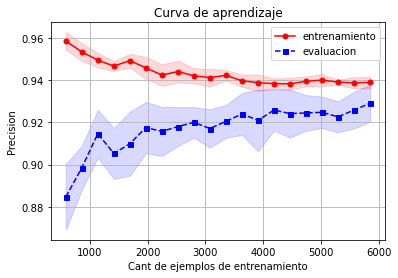

In [8]:
# graficando las curvas
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Curva de aprendizaje')
plt.legend(loc='upper right')
plt.xlabel('Cant de ejemplos de entrenamiento')
plt.ylabel('Precision')
plt.show()

En este gráfico podemos concluir que:

* Con pocos datos la precisión entre los datos de entrenamiento y los de evaluación son muy distintas y luego a medida que la cantidad de datos va aumentando, el modelo puede generalizar mucho mejor y las precisiones se comienzan a emparejar. 


* Este gráfico también puede ser importante a la hora de decidir invertir en la obtención de más datos, ya que por ejemplo nos indica que a partir las 2500 muestras, el modelo ya no gana mucha más precisión a pesar de obtener más datos.

### b) Optimización de parámetros con Grid Search

La mayoría de los modelos de Machine Learning cuentan con varios parámetros para ajustar su comportamiento, por lo tanto, otra alternativa que tenemos para reducir el Sobreajuste es optimizar estos parámetros por medio de un proceso conocido como **grid search** e intentar encontrar la combinación ideal que nos proporcione mayor precisión.

El enfoque que utiliza *grid search* es bastante simple, se trata de una búsqueda exhaustiva por el paradigma de fuerza bruta en el que se especifica una lista de valores para diferentes parámetros, y la computadora evalúa el rendimiento del modelo para cada combinación de éstos parámetros para obtener el conjunto óptimo que nos brinda el mayor rendimiento. 


<img alt="Curva de aprendizaje" title="Curva de aprendizaje" src="https://miro.medium.com/max/3200/1*yHNmVkf43eTJF5QDebUltQ.png" width="700" height="600px" >

In [9]:
# Ejemplo de grid search con SVM.
from sklearn.model_selection import GridSearchCV

# creación del modelo
model = DecisionTreeClassifier()

# rango de parametros
rango_criterion = ['gini','entropy']
rango_max_depth =np.array( [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150])
param_grid = dict(criterion=rango_criterion, max_depth=rango_max_depth)
param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': array([  4,   5,   6,   7,   8,   9,  10,  11,  12,  15,  20,  30,  40,
         50,  70,  90, 120, 150])}

In [10]:
# aplicar greed search

gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

gs = gs.fit(x_train, y_train)

In [11]:
# imprimir resultados
print(gs.best_score_)
print(gs.best_params_)

0.9333846153846153
{'criterion': 'gini', 'max_depth': 6}


In [12]:
# utilizando el mejor modelo
mejor_modelo = gs.best_estimator_
mejor_modelo.fit(x_train, y_train)
print('Precisión: {0:.3f}'.format(mejor_modelo.score(x_eval, y_eval)))

Precisión: 0.941


En este ejemplo, primero utilizamos el objeto `GridSearchCV` que nos permite realizar *grid search* junto con validación cruzada, luego comenzamos a ajustar el modelo con las diferentes combinaciones de los valores de los parámetros `criterion` y `max_depth`. Finalmente imprimimos el mejor resultado de precisión y los valores de los parámetros que utilizamos para obtenerlos; por último utilizamos este mejor modelo para realizar las predicciones con los datos de *evaluación*. 

Podemos ver que la precisión que obtuvimos con los datos de evaluación es casi idéntica a la que nos indicó *grid search*, lo que indica que el modelo *generaliza* muy bien.


### c)  Reducción de dimensionalidad

La **reducción de dimensiones** es frecuentemente usada como una etapa de preproceso en el entrenamiento de
sistemas, y consiste en escoger un subconjunto de
variables, de tal manera, que el espacio de características
quede óptimamente reducido de acuerdo a un criterio de
evaluación, cuyo fin es distinguir el subconjunto que
representa mejor el espacio inicial de entrenamiento.

Como cada característica que se incluye en el análisis,
puede incrementar el costo y el tiempo de proceso de los
sistemas, hay una fuerte motivación para diseñar e
implementar sistemas con pequeños conjuntos de
características. Sin dejar de lado, que al mismo tiempo,
hay una opuesta necesidad de incluir un conjunto
suficiente de características para lograr un alto
rendimiento. 


La reducción de dimensionalidad se puede separar en dos tipos: **Selección de aributos** y **Extracción de atributos**


### c.1) Selección de atributos

Proceso por el cual seleccionamos un subconjunto de atributos (representados por cada una de las columnas en un datasetde forma tabular) que son más relevantes para la construcción del modelo predictivo sobre el que estamos trabajando. 


El objetivo de la selección de atributos es : 
* mejorar la capacidad predictiva de nuestro modelo, 
* proporcionando modelos predictivos más rápidos y eficientes, 
* proporcionar una mejor comprensión del proceso subyacente que generó los datos. 
    
    
Los métodos de selección de atributos se pueden utilizar para identificar y eliminar los atributos innecesarios, irrelevantes y redundantes que no contribuyen a la exactitud del modelo predictivo o incluso puedan disminuir su precisión. 




### Algoritmos para selección de atributos

Podemos encontrar dos clases generales de algoritmos de [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection): los métodos de filtrado, y los métodos empaquetados.

* **Métodos de filtrado**:  Estos métodos aplican una medida estadística para asignar una puntuación a cada atributo. Los atributos luego son clasificados de acuerdo a su puntuación y son, o bien seleccionados para su conservación o eliminados del conjunto de datos. Los métodos de filtrado son a menudo [univariantes](https://en.wikipedia.org/wiki/Univariate_analysis) y consideran a cada atributo en forma independiente, o con respecto a la variable dependiente.
    * Ejemplos : [prueba de Chi cuadrado](https://es.wikipedia.org/wiki/Prueba_%CF%87%C2%B2), [prueba F de Fisher](https://es.wikipedia.org/wiki/Prueba_F_de_Fisher), [ratio de ganancia de información](https://en.wikipedia.org/wiki/Information_gain_ratio) y los [coeficientes de correlación](https://es.wikipedia.org/wiki/Correlaci%C3%B3n).
    

* **Métodos empaquetados**: Estos métodos consideran la selección de un conjunto de atributos como un problema de búsqueda, en donde las diferentes combinaciones son evaluadas y comparadas. Para hacer estas evaluaciones se utiliza un modelo predictivo y luego se asigna una puntuación a cada combinación basada en la precisión del modelo.
    * Un ejemplo de este método es el algoritmo de eliminación recursiva de atributos.

Un método popular en sklearn es el método **SelectKBest**, el cual selecciona las  características de acuerdo con las $k$ puntuaciones más altas (de acuerdo al criterio escogido). 

Para entender este conceptos, transformemos el conjunto de datos anterior a formato pandas DataFrame.

In [13]:
df = pd.DataFrame(X)
df.columns = [f'V{k}' for k in range(1,X.shape[1]+1)]
df['y']=y
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,y
0,0.949283,-1.075706,-0.105733,-0.000047,-0.278974,0.510083,-0.778030,-1.976158,-1.201534,-1.047384,...,-0.630209,-0.331225,-0.202422,-1.786323,1.540031,1.119424,0.507775,-0.848286,-0.027485,1
1,0.183904,0.524554,-1.561357,-1.950628,1.077846,-0.598287,0.153160,-1.206113,0.673170,-0.843770,...,-1.015067,0.319214,0.240570,-2.205400,-0.430933,-0.313175,0.752012,-0.070265,1.390394,0
2,0.499151,-0.625950,2.977037,0.612030,-0.102034,2.076814,1.661343,1.310895,-1.115465,-0.544276,...,0.311830,-1.130865,0.247865,-0.499241,-1.595737,-0.496805,-0.917257,0.976909,-1.518979,0
3,-0.172063,-0.599516,0.154253,-0.593797,0.931374,0.939714,1.107241,0.146723,-0.446275,0.095896,...,-1.641808,-1.170021,0.815094,-0.722564,-0.263476,-0.715898,1.962313,1.076288,-2.259682,0
4,-0.396408,0.876210,-0.791795,0.999677,0.046859,-0.166211,-0.549437,0.344644,0.349981,-0.207106,...,1.307020,0.876912,0.882497,-0.704791,-0.743942,-0.075060,0.622693,0.751576,0.907325,0


Comencemos con un simple algoritmo [univariante](https://en.wikipedia.org/wiki/Univariate_analysis) que aplica el método de filtrado. Para esto vamos a utilizar los objetos `SelectKBest` y `f_classif` del paquete `sklearn.feature_selection`.

Este algoritmo selecciona a los mejores atributos basándose en una prueba estadística [univariante](https://en.wikipedia.org/wiki/Univariate_analysis). Al objeto `SelectKBest` le pasamos la prueba estadística que vamos a a aplicar, en este caso una [prueba F](https://es.wikipedia.org/wiki/Prueba_F_de_Fisher) definida por el objeto `f_classif`, junto con el número de atributos a seleccionar. El algoritmo va a aplicar la prueba a todos los atributos y va a seleccionar los que mejor resultado obtuvieron.


In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Separamos las columnas objetivo
x_training = df.drop(['y',], axis=1)
y_training = df['y']

# Aplicando el algoritmo univariante de prueba F.
k = 15  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)

In [15]:
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
atributos

['V1',
 'V42',
 'V46',
 'V49',
 'V62',
 'V64',
 'V66',
 'V68',
 'V69',
 'V75',
 'V82',
 'V86',
 'V89',
 'V98',
 'V100']

Como podemos ver, el algoritmo nos seleccionó la cantidad de atributos que le indicamos; en este ejemplo decidimos seleccionar solo 15; obviamente, cuando armemos nuestro modelo final vamos a tomar un número mayor de atributos.

### ii) Extracción de atributos

La **extracción de atributos** comienza a partir de un conjunto inicial de datos medidos y crea valores derivados (características) destinados a ser informativos y no redundantes, lo que facilita los pasos de aprendizaje y generalización posteriores, y en algunos casos conduce a a mejores interpretaciones humanas. 

Cuando los datos de entrada a un algoritmo son demasiado grandes para ser procesados y se sospecha que son redundantes (por ejemplo, la misma medición en pies y metros, o la repetitividad de las imágenes presentadas como píxeles), entonces se puede transformar en un conjunto reducido de características (también denominado un vector de características). 

### Análisis de componentes principales


El **análisis de componentes principales** (PCA) es un procedimiento estadístico que utiliza una transformación ortogonal para convertir un conjunto de observaciones de variables posiblemente correlacionadas (entidades que adquieren varios valores numéricos) en un conjunto de valores de variables linealmente no correlacionadas llamadas componentes principales. 

Esta transformación se define de tal manera que el primer componente principal tiene la mayor varianza posible (es decir, representa la mayor variabilidad posible en los datos), y cada componente subsiguiente a su vez tiene la mayor varianza posible bajo la restricción que es ortogonal a los componentes anteriores.

Los vectores resultantes (cada uno de los cuales es una combinación lineal de las variables y contiene n observaciones) son un conjunto de bases ortogonales no correlacionadas. PCA es sensible a la escala relativa de las variables originales.

<img alt="Series de tiempo con Python" title="Series de tiempo con Python" src="https://devopedia.org/images/article/139/4543.1548137789.jpg" high=400px width=600px>

Para ser un poco más ilustrativo con este ejemplo, ocuparemos el conjunto de datos **Iris**

In [16]:
# cargar datos
from sklearn import datasets
iris = datasets.load_iris()


df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['TARGET'] = iris.target
df.columns = ['sepal length', 'sepal width' , 'petal lenght', 'petal width', 'target']
df.head() # estructura de nuestro dataset.

,sepal length,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Como el algoritmo de PCA es sensible a la escala relativa de las variables originales, es necesario **escalar** los datos, es decir,  centrar y escalar los datos. De esta manera, el valor promedio de cada registro sería 0 y la varianza para cada registro sería 1.

Para escalar nuestros datos, usaríamos `StandardScalar`, que está disponible en sklearn.

In [17]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width' , 'petal lenght', 'petal width']

x = df.loc[:, features].values
y = df.loc[:, ['target']].values

x = StandardScaler().fit_transform(x)

Luego aplicamos el algoritmo de `PCA` sobre todos los componenetes, para ver cuanta varianza explica cada variable. 

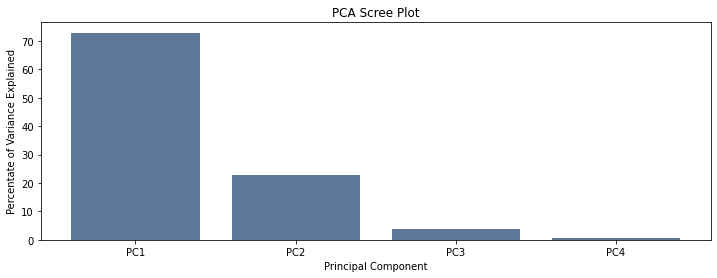

In [18]:
# ajustar modelo
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Ahora realizamos el gráfico pero respecto a la suma acumulada. 

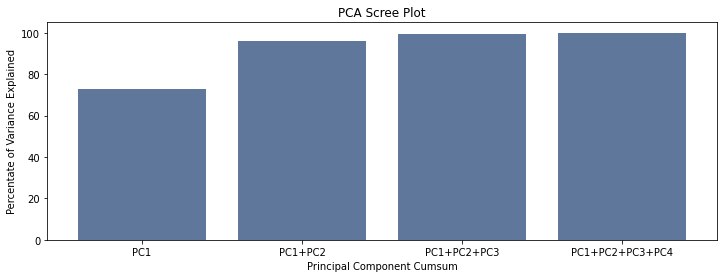

In [19]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Es decir, que la varianza explicada de las variables se puede explicar en 95.81% considerando solo las dos componentes principales (PC1 y PC2).

Realicemos el ajuste para las dos componentes principales y realicemos la nueva gráfica proyectada a estas componentes

In [20]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
targetDataframe = df[['target']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head()

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


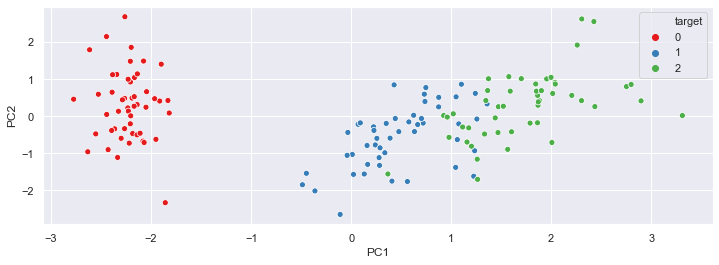

In [21]:
sns.set(rc={'figure.figsize':(12,4)})

sns.scatterplot(x='PC1',
                y='PC2',
                hue='target',
                palette="Set1",
                data=newDataframe)


Finalmente, para poder trabajar los modelos pero en con sus componenetes proyectadas, se debe aplicar la función `fit_transform` sobre el cojunto de atributos.

In [22]:
# componenetes proyectadas

Y= df[['target']]
X_new = pca.fit_transform(df[['sepal length', 'sepal width', 'petal lenght', 'petal width']])

In [23]:
# crear conjunto de entrenamiento y testeo pero en con las componentes proyectadas
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.2, random_state = 2) 

Para finalizar, se deja como ejercicio aplicar el algoritmo de PCA para el conjunto de datos **make_classification** para el número de componentes principales: $$[5,10,20,,50,70,80,90]$$

y sacar sus propias conclusiones.

## Referencia

1. [K-Fold Cross Validation](https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833)
2. [Cross Validation and Grid Search for Model Selection in Python](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/)
3. [Feature selection for supervised models using SelectKBest](https://www.kaggle.com/jepsds/feature-selection-using-selectkbest?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com)
4. [In Depth: Principal Component Analysis](https://www.aprendemachinelearning.com/comprende-principal-component-analysis/)